In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import time
from tqdm.notebook import tqdm
from image.controller import ImageController

/home/kunal.jain001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
dir_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/nina_d1_raw/'

In [14]:
save_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_1/'
log_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_1/log.txt'
plot_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_1/compare_plots/'
sys.stdout = open(log_path, 'w')

In [15]:
# Following values are hardcoded in the pipeline
# crop size - (512, 512)
# threshold range - (130, 40) - See if this can be changed with mean or otsu
# region size - 750 - removes regions less than this size
# metric related -
# minimum region size - consider a relevant region only if size more than 3000
# nr_objects_binary - this value should lie between 200 and 230
# large_regions - this value should lie between 140 and 160

In [17]:
is_segmentation_bad = True
good_image_count, bad_image_count = 0, 0
file_count = 1
for file in tqdm(sorted(os.listdir(dir_path))):
    start_time = time.time()
    if file.endswith(".tif"):
        print("Image Name: " + file)
        img_file = os.path.join(dir_path, file)
        data = ImageController.read(img_file)
        normalized_data = ImageController.normalize(data)
        crop_data = ImageController.center_crop(normalized_data, crop_size=(512, 512))
        data_crop = ImageController.center_crop(data, crop_size=(512, 512))
        smoothed_data = ImageController.smooth(crop_data)
        threshold_value = int(smoothed_data.mean())
        threshold_limit = int(threshold_value) + 40
        for threshold in tqdm(range(threshold_value, threshold_limit, 1)):
            threshold_data = ImageController.threshold(smoothed_data, threshold_value=threshold)
            labeled_data, nr_count = ImageController.label(threshold_data)
            selected_labeled_data = ImageController.select_large_regions(labeled_data, region_size=750)
            binary_mask_data = ImageController.binary_mask(selected_labeled_data)
            closed_binary_mask_data = ImageController.close_binary_mask(binary_mask_data)
            segmented_image = ImageController.binary_image(closed_binary_mask_data)
            nr_objects_binary, large_regions = ImageController.classify_image_nina(binary_mask_data)
            print("Threshold value: ", threshold)
            print("nr_objects_binary: ", nr_objects_binary)
            print("large_regions: ", large_regions)
            if 200 <= nr_objects_binary <= 230 and 140 <= large_regions <= 160:
                print("+++++++++++++++")
                print("Threshold value: ", threshold)
                print("Intensity mean: ", smoothed_data.mean())
                binary_mask_path = os.path.join(save_path,file)
                ImageController.save(binary_mask_path, segmented_image)
                plot_name = os.path.join(plot_path, file)
                plot_name = plot_name.split('.')[0] + '.png'
                ImageController.save_compare(data_crop, segmented_image, plot_name)
                good_image_count = good_image_count + 1
                is_segmentation_bad = False
                break
        end_time = time.time()
        if is_segmentation_bad:
            bad_image_count = bad_image_count + 1
            is_segmentation_bad = True
        print("Total Time Taken: ", (end_time - start_time), " seconds")
        print("Good image count so far: ", good_image_count)
        print("Bad image count so far: ", bad_image_count)
        print("Good and bad image total: ", str(good_image_count + bad_image_count))
        print("Total files processed so far: ", file_count)
        file_count = file_count + 1
        print("---------------------------------------------------------")

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [5]:
print('a')

a


  0%|          | 0/301 [00:00<?, ?it/s]

Image Name: 000000_000000_000903_000000.tif


  0%|          | 0/40 [00:00<?, ?it/s]

Threshold value:  29
nr_objects_binary:  77
large_regions:  48


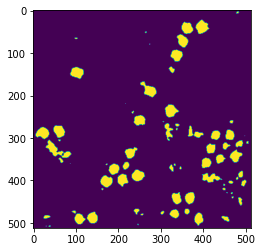

Threshold value:  30
nr_objects_binary:  95
large_regions:  56


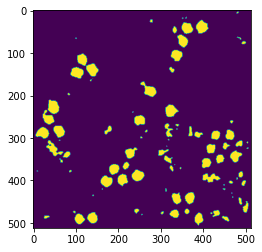

Threshold value:  31
nr_objects_binary:  104
large_regions:  69


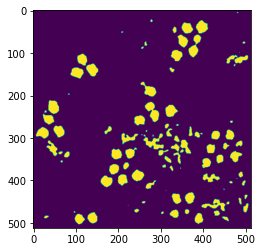

Threshold value:  32
nr_objects_binary:  122
large_regions:  83


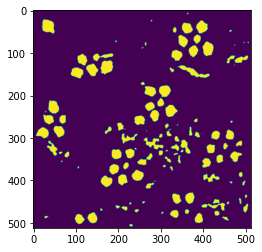

Threshold value:  33
nr_objects_binary:  134
large_regions:  92


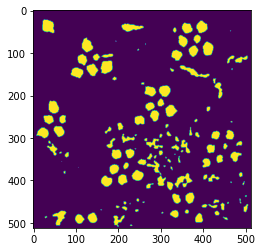

Threshold value:  34
nr_objects_binary:  149
large_regions:  108


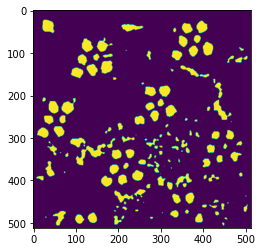

Threshold value:  35
nr_objects_binary:  169
large_regions:  100


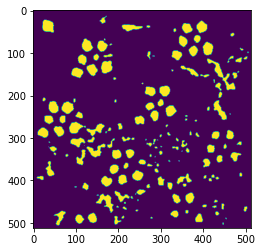

Threshold value:  36
nr_objects_binary:  172
large_regions:  96


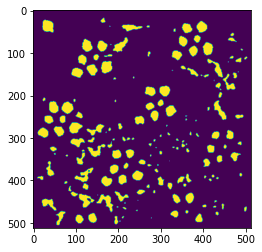

+++++++++++++++
Threshold value:  36
Intensity mean:  29.143386126437907


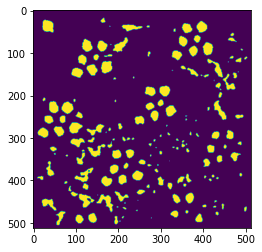

Threshold value:  37
nr_objects_binary:  165
large_regions:  96


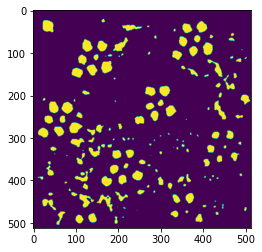

Threshold value:  38
nr_objects_binary:  177
large_regions:  98


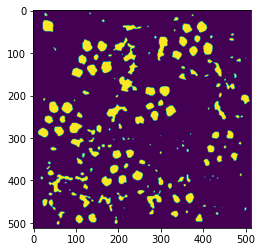

+++++++++++++++
Threshold value:  38
Intensity mean:  29.143386126437907


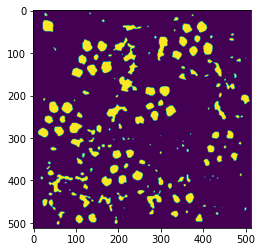

Threshold value:  39
nr_objects_binary:  175
large_regions:  101


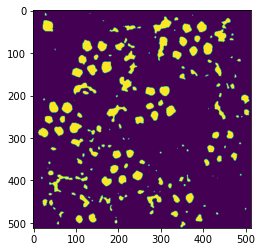

+++++++++++++++
Threshold value:  39
Intensity mean:  29.143386126437907


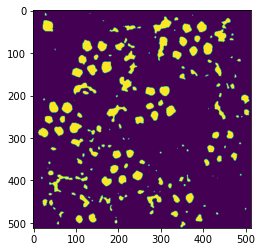

Threshold value:  40
nr_objects_binary:  165
large_regions:  101


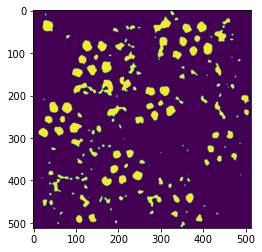

Threshold value:  41
nr_objects_binary:  169
large_regions:  95


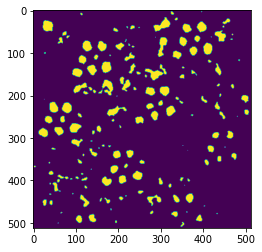

Threshold value:  42
nr_objects_binary:  162
large_regions:  95


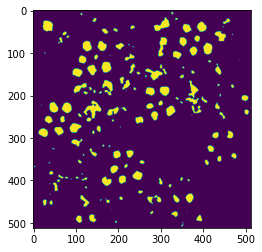

Threshold value:  43
nr_objects_binary:  160
large_regions:  88


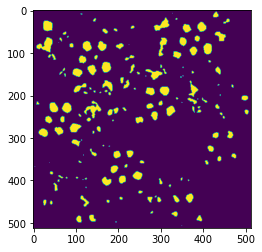

Threshold value:  44
nr_objects_binary:  148
large_regions:  83


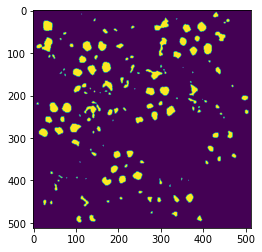

Threshold value:  45
nr_objects_binary:  138
large_regions:  75


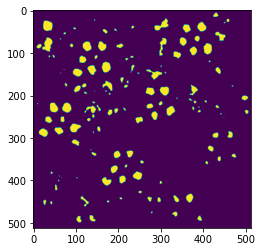

Threshold value:  46
nr_objects_binary:  125
large_regions:  71


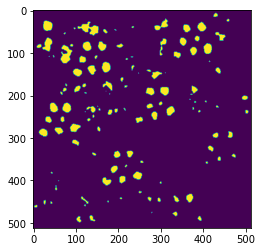

Threshold value:  47
nr_objects_binary:  124
large_regions:  65


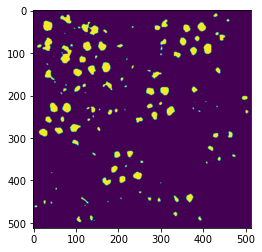

Threshold value:  48
nr_objects_binary:  109
large_regions:  62


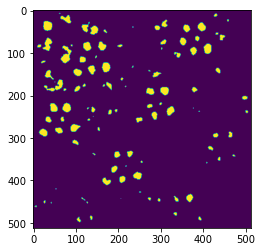

Threshold value:  49
nr_objects_binary:  99
large_regions:  60


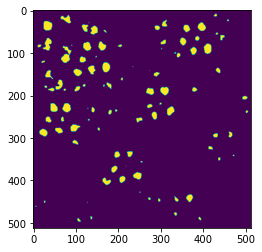

Threshold value:  50
nr_objects_binary:  89
large_regions:  61


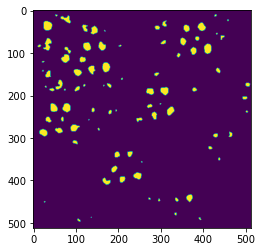

Threshold value:  51
nr_objects_binary:  85
large_regions:  50


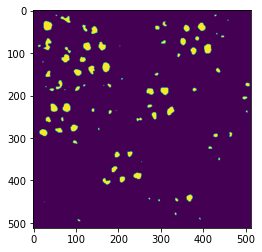

Threshold value:  52
nr_objects_binary:  75
large_regions:  43


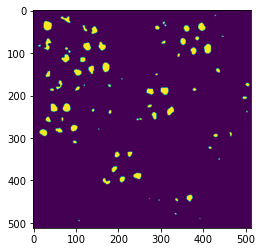

Threshold value:  53
nr_objects_binary:  71
large_regions:  40


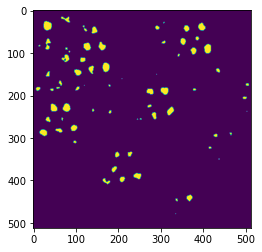

Threshold value:  54
nr_objects_binary:  65
large_regions:  37


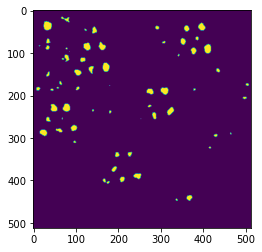

Threshold value:  55
nr_objects_binary:  61
large_regions:  32


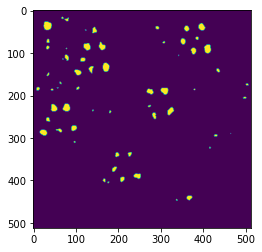

Threshold value:  56
nr_objects_binary:  57
large_regions:  30


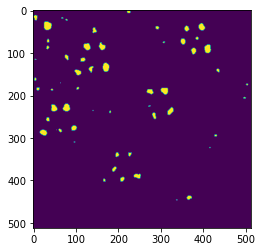

Threshold value:  57
nr_objects_binary:  50
large_regions:  29


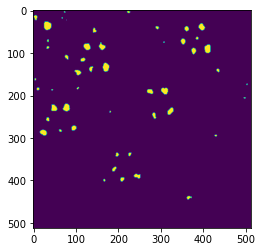

Threshold value:  58
nr_objects_binary:  49
large_regions:  24


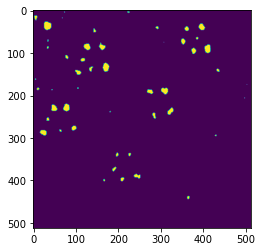

Threshold value:  59
nr_objects_binary:  41
large_regions:  20


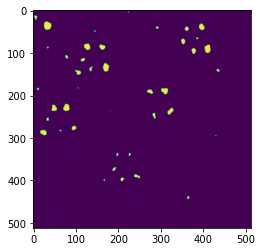

Threshold value:  60
nr_objects_binary:  37
large_regions:  19


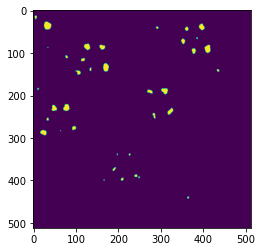

Threshold value:  61
nr_objects_binary:  34
large_regions:  17


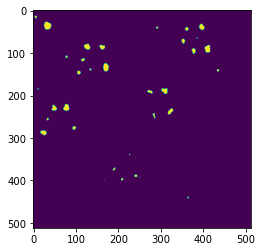

Threshold value:  62
nr_objects_binary:  30
large_regions:  14


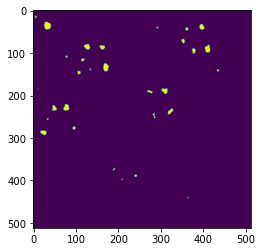

Threshold value:  63
nr_objects_binary:  28
large_regions:  12


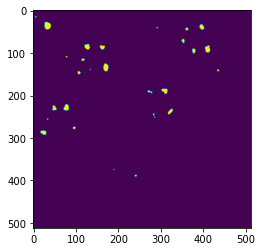

Threshold value:  64
nr_objects_binary:  26
large_regions:  12


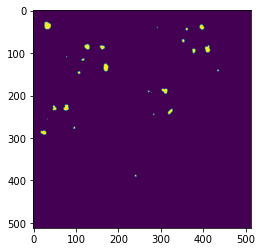

Threshold value:  65
nr_objects_binary:  24
large_regions:  12


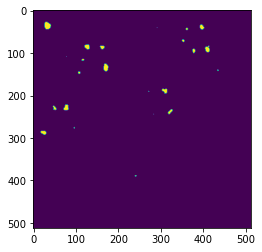

Threshold value:  66
nr_objects_binary:  18
large_regions:  10


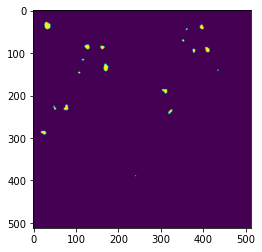

Threshold value:  67
nr_objects_binary:  18
large_regions:  9


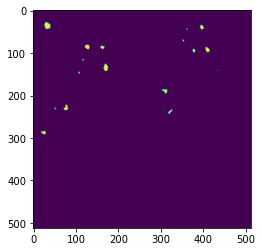

Threshold value:  68
nr_objects_binary:  16
large_regions:  8


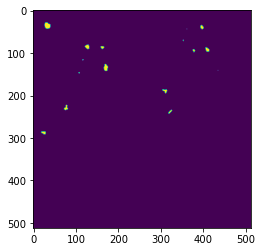

Total Time Taken:  5.316359758377075  seconds
Good image count so far:  3
Bad image count so far:  0
Good and bad image total:  3
Total files processed so far:  1
---------------------------------------------------------
Image Name: 000000_000000_000905_000000.tif


  0%|          | 0/40 [00:00<?, ?it/s]

Threshold value:  29
nr_objects_binary:  79
large_regions:  50


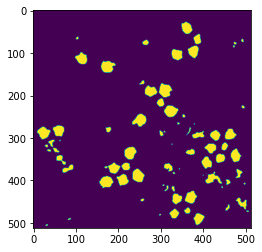

Threshold value:  30
nr_objects_binary:  101
large_regions:  60


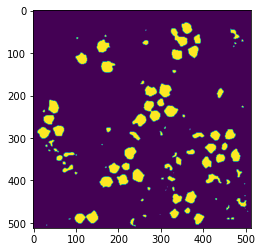

Threshold value:  31
nr_objects_binary:  111
large_regions:  77


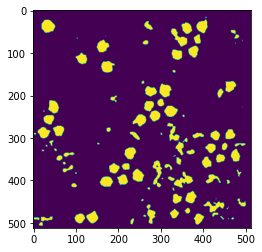

Threshold value:  32
nr_objects_binary:  120
large_regions:  85


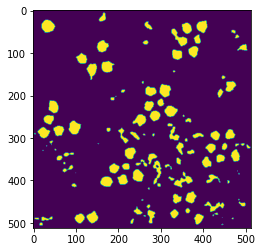

Threshold value:  33
nr_objects_binary:  129
large_regions:  88


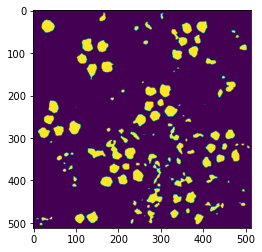

Threshold value:  34
nr_objects_binary:  142
large_regions:  89


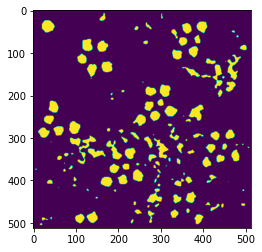

Threshold value:  35
nr_objects_binary:  156
large_regions:  99


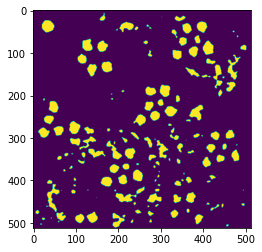

Threshold value:  36
nr_objects_binary:  167
large_regions:  105


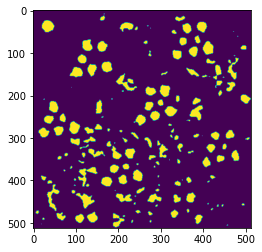

Threshold value:  37
nr_objects_binary:  170
large_regions:  110


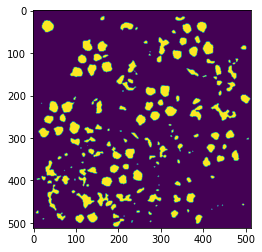

+++++++++++++++
Threshold value:  37
Intensity mean:  29.24035932816866


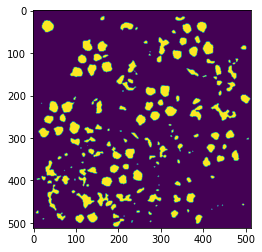

Threshold value:  38
nr_objects_binary:  169
large_regions:  118


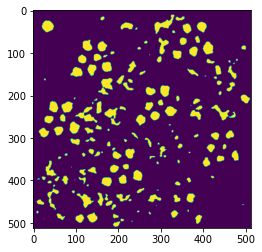

Threshold value:  39
nr_objects_binary:  172
large_regions:  122


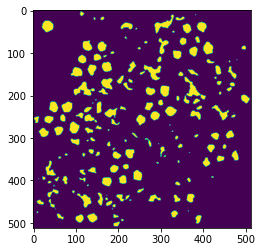

+++++++++++++++
Threshold value:  39
Intensity mean:  29.24035932816866


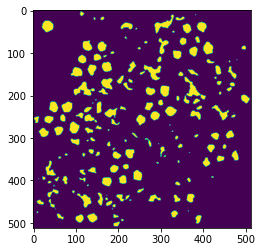

Threshold value:  40
nr_objects_binary:  175
large_regions:  120


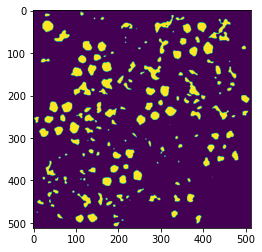

+++++++++++++++
Threshold value:  40
Intensity mean:  29.24035932816866


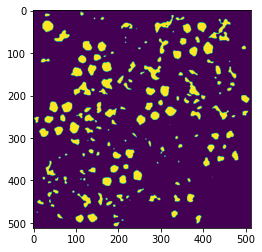

Threshold value:  41
nr_objects_binary:  178
large_regions:  109


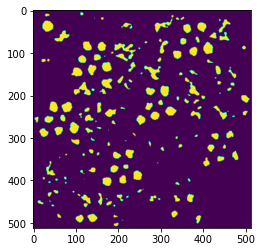

+++++++++++++++
Threshold value:  41
Intensity mean:  29.24035932816866


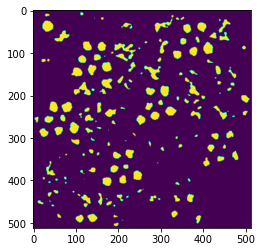

Threshold value:  42
nr_objects_binary:  176
large_regions:  94


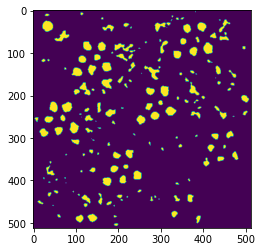

+++++++++++++++
Threshold value:  42
Intensity mean:  29.24035932816866


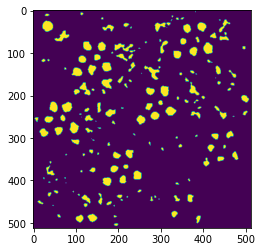

Threshold value:  43
nr_objects_binary:  170
large_regions:  89


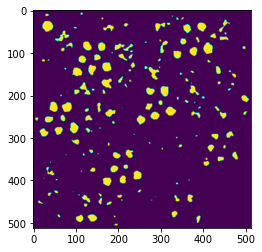

+++++++++++++++
Threshold value:  43
Intensity mean:  29.24035932816866


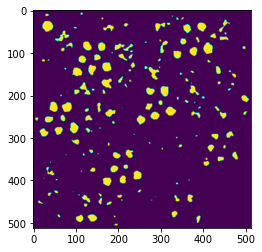

Threshold value:  44
nr_objects_binary:  159
large_regions:  86


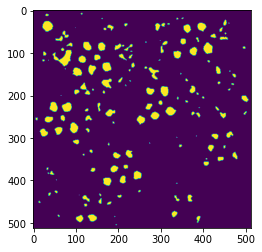

Threshold value:  45
nr_objects_binary:  150
large_regions:  81


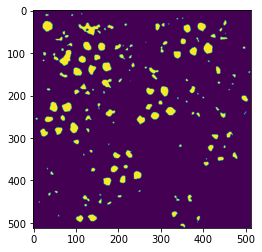

Threshold value:  46
nr_objects_binary:  139
large_regions:  71


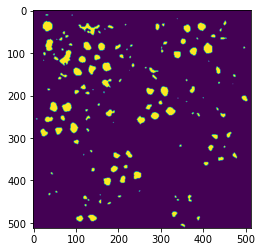

Threshold value:  47
nr_objects_binary:  130
large_regions:  63


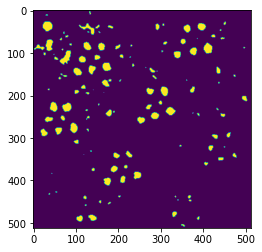

Threshold value:  48
nr_objects_binary:  123
large_regions:  59


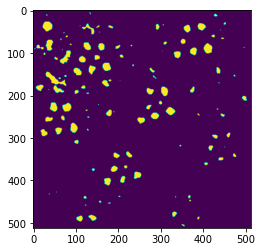

Threshold value:  49
nr_objects_binary:  99
large_regions:  55


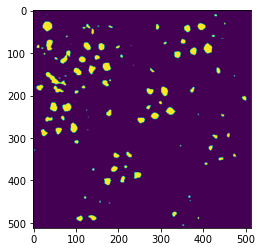

Threshold value:  50
nr_objects_binary:  87
large_regions:  52


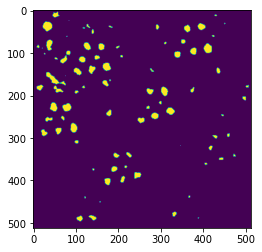

Threshold value:  51
nr_objects_binary:  82
large_regions:  46


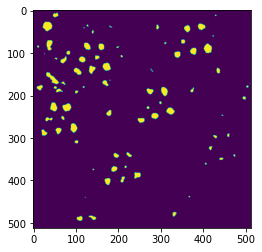

Threshold value:  52
nr_objects_binary:  75
large_regions:  44


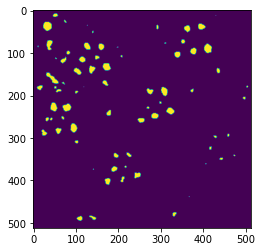

Threshold value:  53
nr_objects_binary:  67
large_regions:  41


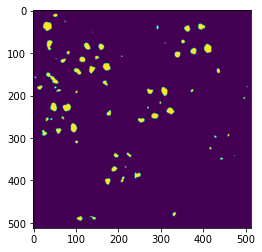

Threshold value:  54
nr_objects_binary:  63
large_regions:  35


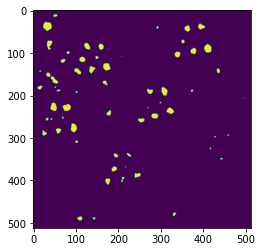

Threshold value:  55
nr_objects_binary:  58
large_regions:  35


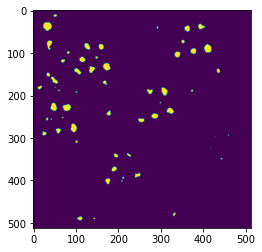

Threshold value:  56
nr_objects_binary:  52
large_regions:  31


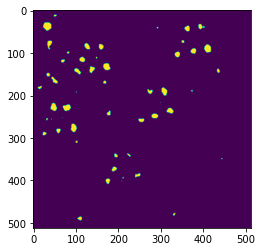

Threshold value:  57
nr_objects_binary:  48
large_regions:  29


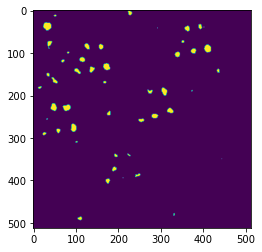

Threshold value:  58
nr_objects_binary:  43
large_regions:  28


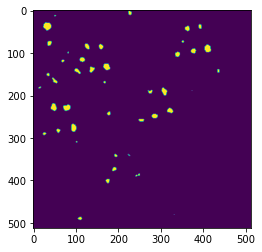

Threshold value:  59
nr_objects_binary:  41
large_regions:  23


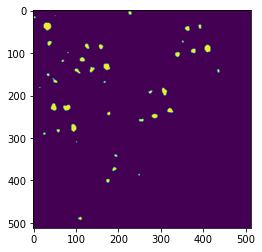

Threshold value:  60
nr_objects_binary:  38
large_regions:  18


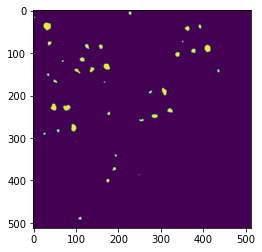

Threshold value:  61
nr_objects_binary:  36
large_regions:  17


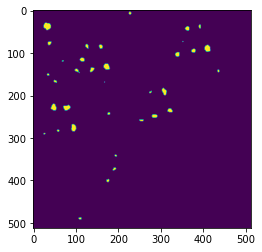

Threshold value:  62
nr_objects_binary:  33
large_regions:  15


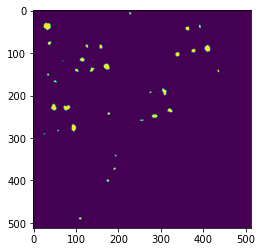

Threshold value:  63
nr_objects_binary:  31
large_regions:  14


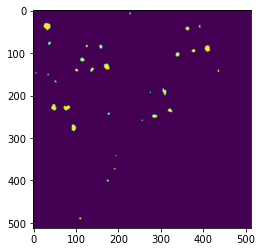

Threshold value:  64
nr_objects_binary:  26
large_regions:  12


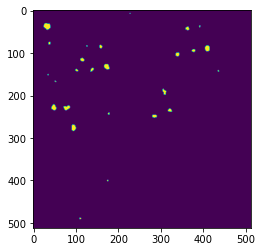

Threshold value:  65
nr_objects_binary:  24
large_regions:  10


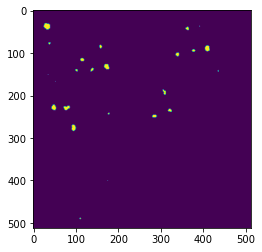

Threshold value:  66
nr_objects_binary:  20
large_regions:  8


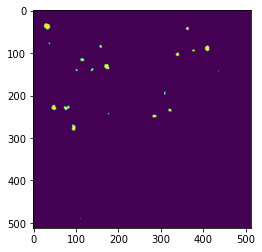

Threshold value:  67
nr_objects_binary:  18
large_regions:  6


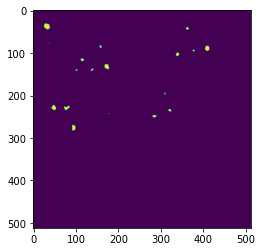

Threshold value:  68
nr_objects_binary:  17
large_regions:  5


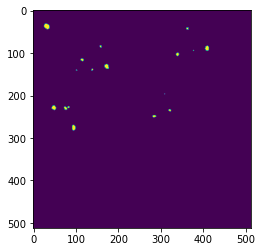

Total Time Taken:  5.865638732910156  seconds
Good image count so far:  9
Bad image count so far:  0
Good and bad image total:  9
Total files processed so far:  2
---------------------------------------------------------
Image Name: 000000_000000_000906_000000.tif


  0%|          | 0/40 [00:00<?, ?it/s]

Threshold value:  29
nr_objects_binary:  86
large_regions:  58


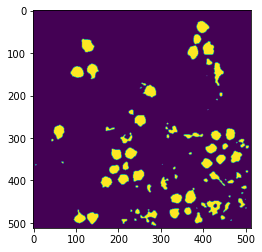

Threshold value:  30
nr_objects_binary:  96
large_regions:  63


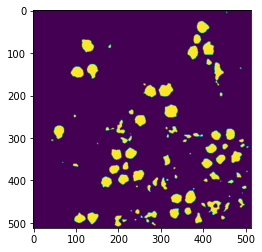

Threshold value:  31
nr_objects_binary:  105
large_regions:  66


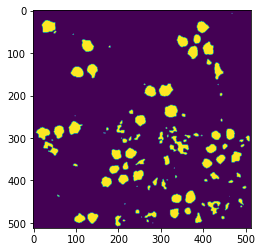

Threshold value:  32
nr_objects_binary:  107
large_regions:  69


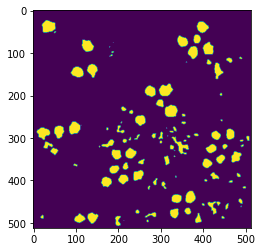

Threshold value:  33
nr_objects_binary:  117
large_regions:  74


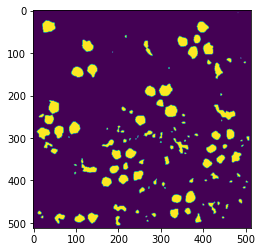

Threshold value:  34
nr_objects_binary:  131
large_regions:  81


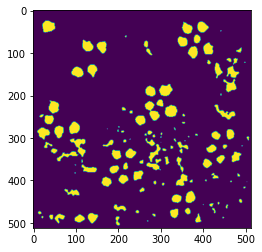

Threshold value:  35
nr_objects_binary:  144
large_regions:  93


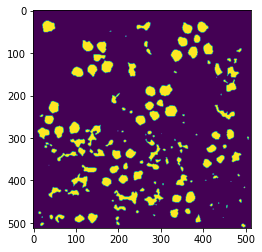

Threshold value:  36
nr_objects_binary:  155
large_regions:  92


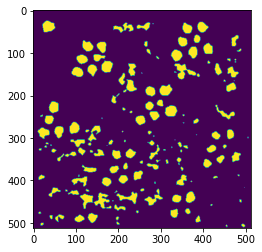

Threshold value:  37
nr_objects_binary:  157
large_regions:  99


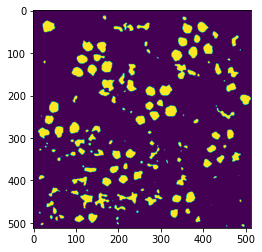

Threshold value:  38
nr_objects_binary:  161
large_regions:  108


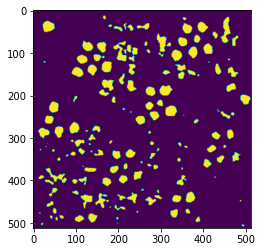

Threshold value:  39
nr_objects_binary:  173
large_regions:  113


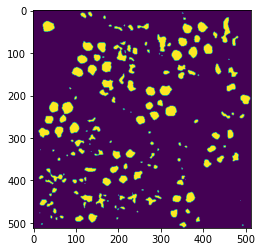

+++++++++++++++
Threshold value:  39
Intensity mean:  29.497295056507273


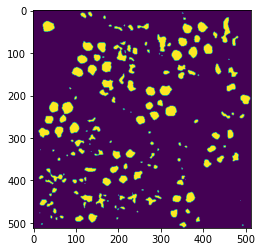

Threshold value:  40
nr_objects_binary:  165
large_regions:  107


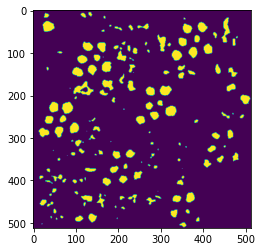

Threshold value:  41
nr_objects_binary:  161
large_regions:  101


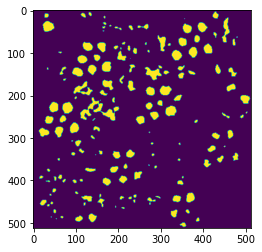

Threshold value:  42
nr_objects_binary:  162
large_regions:  96


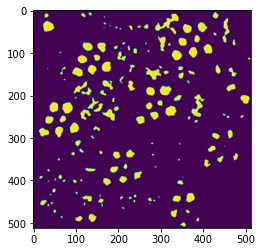

Threshold value:  43
nr_objects_binary:  157
large_regions:  91


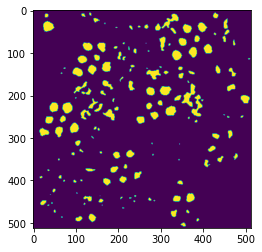

Threshold value:  44
nr_objects_binary:  157
large_regions:  97


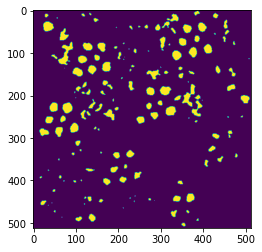

Threshold value:  45
nr_objects_binary:  147
large_regions:  91


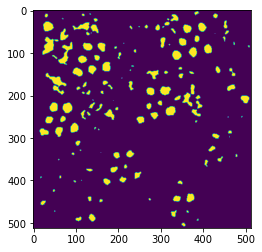

Threshold value:  46
nr_objects_binary:  141
large_regions:  81


KeyboardInterrupt: 

In [6]:
save_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_2/'
log_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_2/log.txt'
plot_path = '/raid/mpsych/RISTERLAB/fly_segmentation_experiments/data_dir/04-14/nina_d1_mutant/binary_mask_2/compare_plots/'

# Following values are hardcoded in the pipeline
# crop size - (512, 512)
# threshold range - mean plus 20
# region size - 750 - removes regions less than this size
# metric related -
# minimum region size - consider a relevant region only if size more than 3000
# nr_objects_binary - this value should lie between 170 and 210
# large_regions - this value should lie between 80 and 100

is_segmentation_bad = True
good_image_count, bad_image_count = 0, 0
file_count = 1
for file in tqdm(sorted(os.listdir(dir_path))):
    start_time = time.time()
    if file.endswith(".tif"):
        print("Image Name: " + file)
        img_file = os.path.join(dir_path, file)
        data = ImageController.read(img_file)
        normalized_data = ImageController.normalize(data)
        crop_data = ImageController.center_crop(normalized_data, crop_size=(512, 512))
        data_crop = ImageController.center_crop(data, crop_size=(512, 512))
        smoothed_data = ImageController.smooth(crop_data)
        threshold_value = int(smoothed_data.mean())
        threshold_limit = int(threshold_value) + 40
        for threshold in tqdm(range(threshold_value, threshold_limit, 1)):
            threshold_data = ImageController.threshold(smoothed_data, threshold_value=threshold)
            labeled_data, nr_count = ImageController.label(threshold_data)
            selected_labeled_data = ImageController.select_large_regions(labeled_data, region_size=750)
            binary_mask_data = ImageController.binary_mask(selected_labeled_data)
            closed_binary_mask_data = ImageController.close_binary_mask(binary_mask_data)
            segmented_image = ImageController.binary_image(closed_binary_mask_data)
            nr_objects_binary, large_regions = ImageController.classify_image_nina(binary_mask_data)
            print("Threshold value: ", threshold)
            print("nr_objects_binary: ", nr_objects_binary)
            print("large_regions: ", large_regions)
            ImageController.display(segmented_image)
            if 170 <= nr_objects_binary <= 230 and 80 <= large_regions <= 150:
                print("+++++++++++++++")
                print("Threshold value: ", threshold)
                print("Intensity mean: ", smoothed_data.mean())
                binary_mask_path = os.path.join(save_path,file)
                ImageController.display(segmented_image)
                # ImageController.save(binary_mask_path, segmented_image)
                plot_name = os.path.join(plot_path, file)
                plot_name = plot_name.split('.')[0] + '_' + str(time.time()) + '.png'
                ImageController.save_compare(data_crop, segmented_image, plot_name)
                good_image_count = good_image_count + 1
                is_segmentation_bad = False
        end_time = time.time()
        if is_segmentation_bad:
            bad_image_count = bad_image_count + 1
            is_segmentation_bad = True
        print("Total Time Taken: ", (end_time - start_time), " seconds")
        print("Good image count so far: ", good_image_count)
        print("Bad image count so far: ", bad_image_count)
        print("Good and bad image total: ", str(good_image_count + bad_image_count))
        print("Total files processed so far: ", file_count)
        file_count = file_count + 1
        print("---------------------------------------------------------")

In [ ]:
sys.stdout.close()